## Sentiment Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

In [3]:

df = pd.read_csv("data_science.csv")

C:\Users\Rhushabh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:


df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1406400408545804288,1406400396264943616,2021-06-20 05:26:01 IST,2021-06-20,05:26:01,530,1113747629282930688,ballouxfrancois,Prof Francois Balloux,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1406390341176016897,1406390341176016897,2021-06-20 04:46:01 IST,2021-06-20,04:46:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1406386311481774083,1406386311481774083,2021-06-20 04:30:00 IST,2021-06-20,04:30:00,530,19402238,sciencenews,Science News,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1406383545153638402,1406383545153638402,2021-06-20 04:19:01 IST,2021-06-20,04:19:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1406358632648818689,1406358632648818689,2021-06-20 02:40:01 IST,2021-06-20,02:40:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241381,7516204805,7516204805,2010-01-08 17:36:43 IST,2010-01-08,17:36:43,530,20611338,paulvieira,Paul Vieira,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
241382,7445162404,7445162404,2010-01-06 21:41:51 IST,2010-01-06,21:41:51,530,6806592,pedrodias,Pedro Dias,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
241383,7423411210,7423332793,2010-01-06 07:01:47 IST,2010-01-06,07:01:47,530,1315431,lizstrauss,Liz Strauss,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
241384,7376226272,7376226272,2010-01-05 00:54:11 IST,2010-01-05,00:54:11,530,22105603,natashamitchell,Natasha Mitchell,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
df.shape

(241386, 36)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241386 entries, 0 to 241385
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               241386 non-null  int64  
 1   conversation_id  241386 non-null  int64  
 2   created_at       241386 non-null  object 
 3   date             241386 non-null  object 
 4   time             241386 non-null  object 
 5   timezone         241386 non-null  int64  
 6   user_id          241386 non-null  int64  
 7   username         241386 non-null  object 
 8   name             241386 non-null  object 
 9   place            354 non-null     object 
 10  tweet            241386 non-null  object 
 11  language         241386 non-null  object 
 12  mentions         241386 non-null  object 
 13  urls             241386 non-null  object 
 14  photos           241386 non-null  object 
 15  replies_count    241386 non-null  int64  
 16  retweets_count   241386 non-null  int6

In [7]:
df["tweet"]

0         What can be done?  - Never blindly trust an ab...
1         "We need a paradigm shift from model-centric t...
2         Using high-resolution satellite data and compu...
3         .@Stephenson_Data shares four steps that will ...
4         "Curricula is inherently brittle in a world wh...
                                ...                        
241381    Cda jobs data, Dec: employment rose in health,...
241382    RT @filiber: Have a Computer Science backgroun...
241383    @pop17 Heck with science. I've got empirical d...
241384    All in the....data RT @noahWG Dr. Petra provid...
241385    “The world of retail will always be a mix of a...
Name: tweet, Length: 241386, dtype: object

In [8]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text

    return tweet
    

df['tweet_clean'] = df['tweet'].apply(cleaner)

In [9]:
df['tweet_clean']

0         What can be done? - Never blindly trust an abs...
1         "We need a paradigm shift from model-centric t...
2         Using high-resolution satellite data and compu...
3         . Data shares four steps that will help new da...
4         "Curricula is inherently brittle in a world wh...
                                ...                        
241381    Cda jobs data, Dec: employment rose in health,...
241382    RT : Have a Computer Science background? Love ...
241383    Heck with science. I've got empirical data. he...
241384    All in the....data RT Dr. Petra provides persp...
241385    “The world of retail will always be a mix of a...
Name: tweet_clean, Length: 241386, dtype: object

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [11]:
list1 = []
for i in df['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

In [12]:
list1

[-0.1783,
 0.0,
 0.0,
 0.743,
 0.4019,
 -0.3182,
 0.9439,
 0.0,
 0.0,
 0.2023,
 0.4215,
 0.5106,
 0.0,
 0.4019,
 0.2023,
 0.0,
 0.0,
 0.0,
 0.4278,
 0.0,
 0.3612,
 0.0,
 0.7184,
 0.0,
 0.1604,
 0.296,
 0.2023,
 0.0,
 0.0,
 0.0,
 0.4767,
 0.0,
 0.0,
 0.4215,
 0.0,
 0.0,
 -0.765,
 -0.6969,
 0.4767,
 0.6369,
 0.4215,
 0.0,
 0.4404,
 0.0,
 -0.4951,
 0.6705,
 0.4404,
 0.4588,
 0.836,
 -0.2023,
 0.7456,
 0.8834,
 0.8225,
 0.6734,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1531,
 0.6249,
 0.6361,
 -0.2023,
 0.3612,
 0.3182,
 0.7178,
 -0.25,
 0.2732,
 0.0,
 0.5859,
 0.5499,
 0.3182,
 0.5574,
 0.3182,
 0.2944,
 0.3182,
 0.7876,
 0.4767,
 0.6124,
 0.0,
 0.296,
 0.2263,
 -0.8316,
 0.6114,
 -0.4019,
 -0.296,
 0.5719,
 0.0,
 0.8439,
 0.3182,
 0.8779,
 0.3384,
 -0.0258,
 0.8999,
 0.765,
 0.5267,
 0.5334,
 0.6662,
 0.2263,
 0.5994,
 0.6883,
 0.2732,
 -0.5574,
 0.9001,
 0.0,
 0.0,
 0.0,
 0.3612,
 0.3182,
 0.0,
 0.0,
 0.4019,
 0.296,
 0.9462,
 0.6369,
 0.0,
 -0.2732,
 0.6841,
 0.7003,
 -0.3818,
 0.6124,
 0.6249,
 0.0

In [13]:
df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [14]:
df = df[['tweet','date','id','sentiment','sentiment_category']]
df.head()

,tweet,date,id,sentiment,sentiment_category
0,What can be done? - Never blindly trust an ab...,2021-06-20,1406400408545804288,-0.1783,negative
1,"""We need a paradigm shift from model-centric t...",2021-06-20,1406390341176016897,0.0000,neutral
2,Using high-resolution satellite data and compu...,2021-06-20,1406386311481774083,0.0000,neutral
3,.@Stephenson_Data shares four steps that will ...,2021-06-20,1406383545153638402,0.7430,positive
4,"""Curricula is inherently brittle in a world wh...",2021-06-20,1406358632648818689,0.4019,positive


In [15]:
df[df["sentiment_category"] == 'positive'].count()

tweet                 118849
date                  118849
id                    118849
sentiment             118849
sentiment_category    118849
dtype: int64

In [17]:
df[df["sentiment_category"] == 'negative'].count()

tweet                 24342
date                  24342
id                    24342
sentiment             24342
sentiment_category    24342
dtype: int64

In [18]:
df[df["sentiment_category"] == 'neutral'].count()

tweet                 98195
date                  98195
id                    98195
sentiment             98195
sentiment_category    98195
dtype: int64

In [26]:
sentiment = ['positive','negative','neutral']
people = [118849, 24342, 98195]

C:\Users\Rhushabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

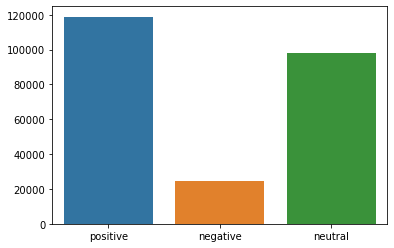

In [27]:
sns.barplot(sentiment,people)